Problem Statement

The objective of this analysis is to identify lifestyle and health factors influencing sleep quality.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Health_Sleep_Statistics.csv")

In [3]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [4]:
df.shape

(100, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [6]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [7]:
df.isnull().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

Fearture Engineering

In [10]:
for col in ['Bedtime', 'Wake-up Time']:
    time = pd.to_datetime(df[col], format='%H:%M')
    df[col] = time.dt.hour + time.dt.minute / 60

In [11]:
df['Sleep Duration'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration
0,1,25,f,8,23.00,6.50,8000,2500,medium,healthy,no,no,7.5
1,2,34,m,7,0.50,7.00,5000,2200,low,unhealthy,yes,yes,6.5
2,3,29,f,9,22.75,6.75,9000,2700,high,healthy,no,no,8.0
3,4,41,m,5,1.00,6.50,4000,2100,low,unhealthy,yes,no,5.5
4,5,22,f,8,23.50,7.00,10000,2800,high,medium,no,no,7.5


Correlation Analysis (Numerical Overview)

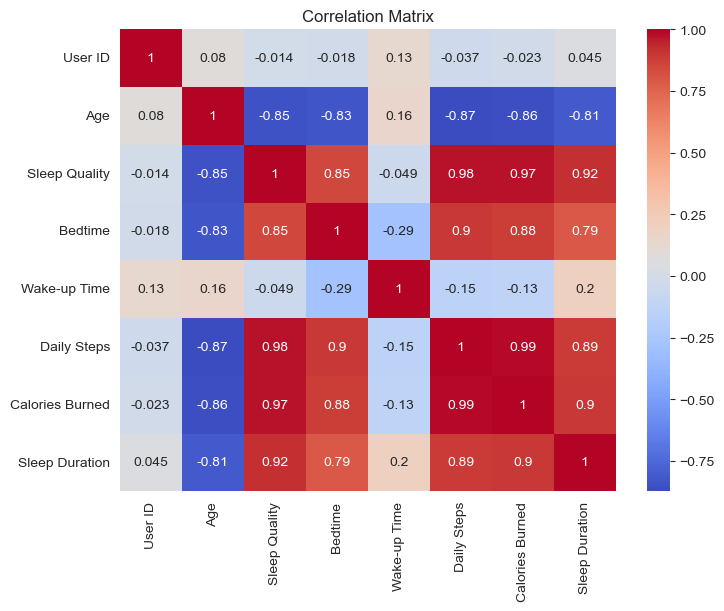

In [12]:
numerical_df = df.select_dtypes(include='number')
corr = numerical_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Key Visual Insights

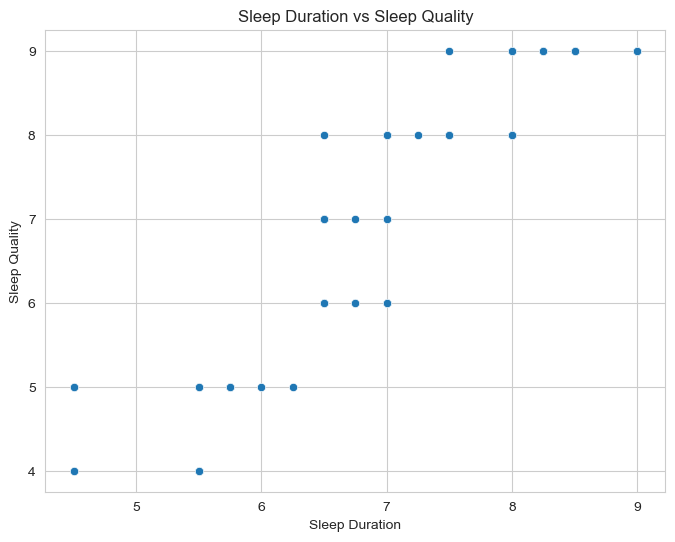

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sleep Duration', y='Sleep Quality', data=df)
plt.title("Sleep Duration vs Sleep Quality")
plt.show()

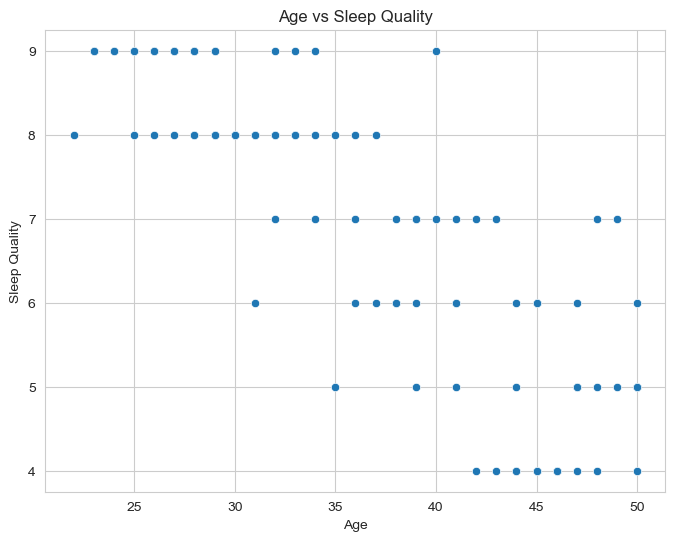

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Sleep Quality', data=df)
plt.title("Age vs Sleep Quality")
plt.show()

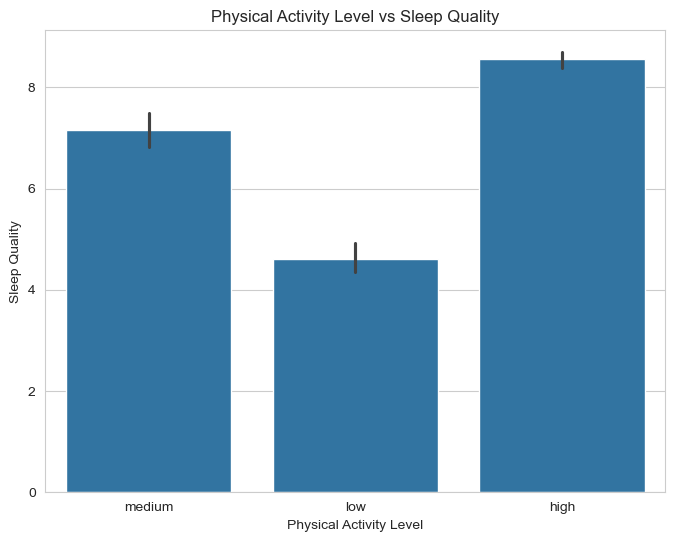

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='Physical Activity Level', y='Sleep Quality', data=df)
plt.title("Physical Activity Level vs Sleep Quality")
plt.show()

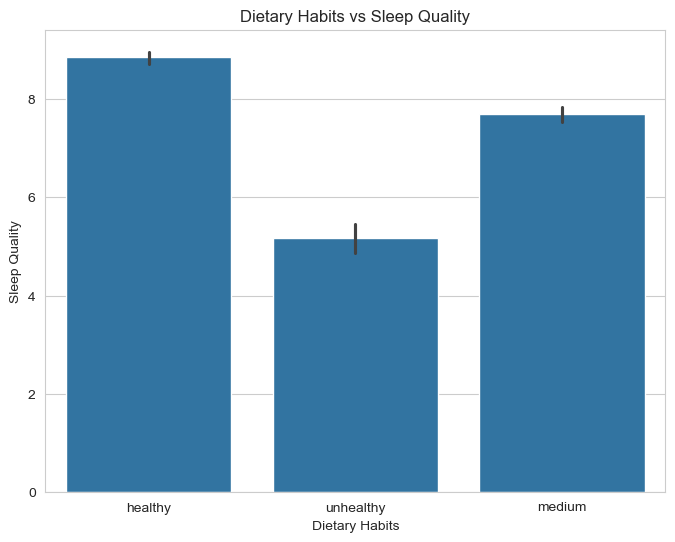

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='Dietary Habits', y='Sleep Quality', data=df)
plt.title("Dietary Habits vs Sleep Quality")
plt.show()

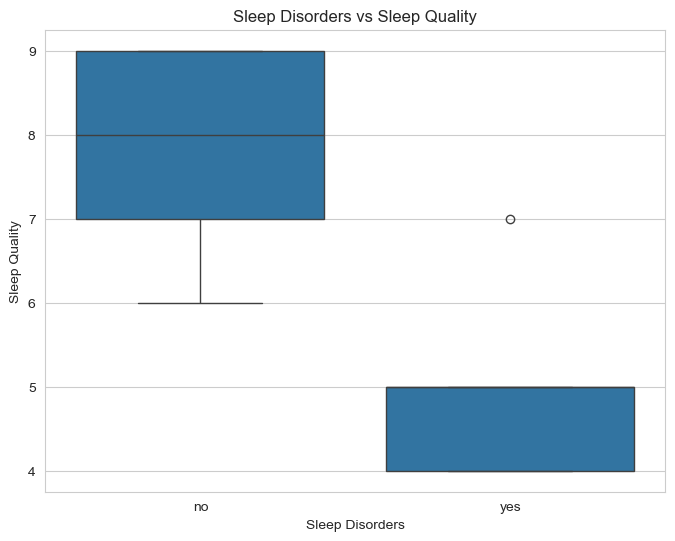

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.title("Sleep Disorders vs Sleep Quality")
plt.show()

In [18]:
df.to_csv("health_cleaned.csv", index=False)

## Key Insights

1. Sleep duration shows strong positive relationship with sleep quality.
2. Higher physical activity levels are associated with better sleep.
3. Healthy dietary habits correlate with improved sleep quality.
4. Individuals with sleep disorders report significantly lower sleep quality.
5. Age shows a moderate negative relationship with sleep quality.